In [1]:
import sys

sys.path.append("../")

In [2]:
from traditional_models.utils import get_fashion_mnist

X_train, X_test, y_train, y_test = get_fashion_mnist(return_numpy=True)

First step - data augumentation and setting pixels either to 0 or 1

In [3]:
from traditional_models.preprocessing import to_black_white, generate_additional

X_train, y_train = generate_additional(X_train, y_train)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train = to_black_white(X_train, threshold=80)
X_test = to_black_white(X_test, threshold=80)

Let's have a look at original and rotated images

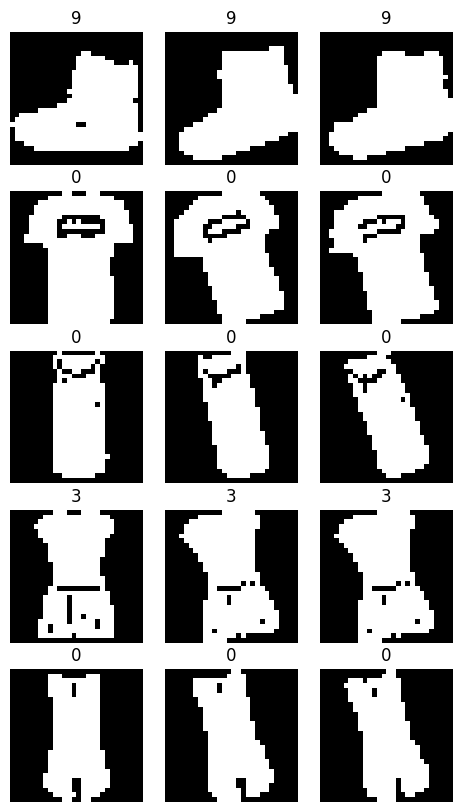

In [4]:
from traditional_models.utils import plot_images

z = 60000
j = 0
to_plot = []
for i in range(5):
    to_plot += [i, z + j, z + j + 1]
    j += 2

plot_images(X_train[to_plot, :].reshape(len(to_plot), 28, 28), y_train[to_plot], ncols=3, cmap="gray")

2nd step - basic dimensionality reduction - remove redundant pixels

In [5]:
from traditional_models.preprocessing import drop_unused

org_size = X_train.shape[1]
X_train, keep = drop_unused(X_train)
X_test, _ = drop_unused(X_test, keep)

print(f"Removed {org_size - len(keep)} pixels")

Removed 2 pixels


In [6]:
from traditional_models.utils import save_np

save_np(X_train, y_train, "train.npy")
save_np(X_test, y_test, "test.npy")